In [36]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import pandas as pd
import math
from sklearn.metrics import confusion_matrix as CM
import random
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt

In [37]:
def crossValidation_forest(x,y):
    """
    version 3
    
    """
    crossErrors=[]
    confusion_matrix=[]
    #svc=svm.LinearSVC()
    rf=RFC(n_estimators=100,max_features=None)
    kf = KFold(x.shape[0], n_folds=5,shuffle=True)
    for train,test in kf:
        rf.fit(x.ix[train],y[train])
        prediction=rf.predict(x.ix[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors),confusion_matrix

In [38]:
def layer_rbf(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=10.,n_components=x.shape[1])
    x_kpca=pd.DataFrame(kpca.fit_transform(x))
    
#     xT=np.concatenate((x,x_kpca),axis=1)
    
    crossErrors=[]
    for i in range(x.shape[1]):
        crossError,c=crossValidation_forest(x.drop(i,axis=1),y)
        crossErrors.append(crossError)
    
    drop=crossErrors.index(max(crossErrors))
    
    

    numOfFeatures=x_kpca.shape[1]
    
    addFeatureErrors=[]
    cms=[]
    for i in xrange(numOfFeatures):
        addcrossErrors,cm=crossValidation_forest(pd.concat((x.drop(drop,axis=1),x_kpca[i]),axis=1),y)
        addFeatureErrors.append(addcrossErrors)
        cms.append(cm)
       
    choice=addFeatureErrors.index(min(addFeatureErrors))
    
    if max(crossErrors)<min(addFeatureErrors):
        return x,addFeatureErrors,(max(crossErrors),min(addFeatureErrors)),True 
    else:
        result=pd.concat((x.drop(drop,axis=1),x_kpca[choice]),axis=1)
        result.columns=[i for i in range(result.shape[1])]
        return result,addFeatureErrors,(drop,choice),False

In [39]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [40]:
def plotdata(x,y):
    n=x.shape[1]
    fig,ax=plt.subplots(ncols=n,nrows=n)
    fig.set_size_inches(9,6)
    for i in xrange(n):
        for j in xrange(i+1):
            for t,color in zip(xrange(3),'rgb'):
                ax[i][j].scatter(x.ix[y == t,i],x.ix[y == t,j],c=color)
    plt.show()

In [ ]:
# from sklearn.datasets import load_iris
# iris=load_iris()
# x=iris.data
# y=iris.target

In [20]:
path=r"C:\Users\zc\Documents\MNIST data\train.csv"
mnist=pd.read_csv(path,sep=",")
#print mnist.columns
y=mnist['label']
print mnist.shape
x=mnist.drop('label',axis=1)

(42000, 785)


In [25]:
u,s,v=np.linalg.svd(x)

MemoryError: 

In [29]:
pca = PCA(n_components=x.shape[1])
pca.fit(x)
print(sum(pca.explained_variance_ratio_))

1.0


In [30]:
print(sum(pca.explained_variance_ratio_))

1.0


In [28]:
explainedRatio=[]
explained=0
for i in pca.explained_variance_ratio_:
    explained+=i
    explainedRatio.append(explained)

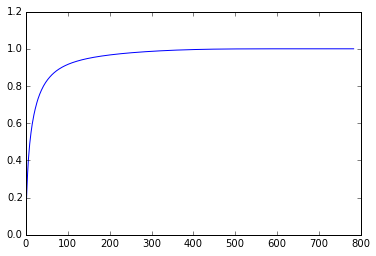

In [32]:
index=range(len(explainedRatio))
from matplotlib import pyplot as plt
plt.plot(index,explainedRatio)

In [34]:
for i in range(len(explainedRatio)):
    if explainedRatio[i]>0.95:
        break
print i

153


In [35]:
pca = PCA(n_components=i)
x_c=pca.fit_transform(x)

In [41]:
resultlist,errorlist,decisionlist=[],[],[]
flag=False
loop=1

In [42]:
result=x_c
while not flag:
    print loop
    loop+=1
    result,error,decision,flag=layer_rbf(result,y)
    resultlist.append(result)
    errorlist.append(error)
    decisionlist.append(decision)
    result=None
    error=None
    decision=None

1


MemoryError: 

In [ ]:
for i in range(loop):
    plotdata(resultlist[i],y)

In [ ]:
for i in range(loop):
    plotErr(errorlist[i])